### Importing libraries

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Ignoring warnings

In [95]:
import warnings
warnings.filterwarnings('ignore')

### Extracting the data

In [96]:
dataFrame = pd.read_csv('../data/week1_challenge.csv', na_values=['?', None])
dataFrame.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [97]:
# number of data points
print(f" There are {dataFrame.shape[0]} rows and {dataFrame.shape[1]} columns")

 There are 150001 rows and 55 columns


# checking missing values

In [98]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(dataFrame.shape)

    # Count number of missing values per column
    missingCount = dataFrame.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Tellco dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(dataFrame)

The Tellco dataset contains 12.5 % missing values.


# as we see above I have 12.5% of missing values in the dataset

In [99]:
#inorder to get which columns has missing value
missing_value=dataFrame.isna().sum()
missing_value

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

# from the above I Listed out the missing values in each columns

In [100]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = dataFrame.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * dataFrame.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = dataFrame.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(dataFrame.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

print(missing_values_table(dataFrame))

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)                             

### cleaning

In [101]:
# drop columns with more than 30% missing values
df_clean = db.drop(['Nb of sec with 125000B < Vol DL','Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with 125000B < Vol DL',
                   'TCP UL Retrans. Vol (Bytes)','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 6250B < Vol DL < 31250B',
                    'TCP DL Retrans. Vol (Bytes)','HTTP UL (Bytes)'], axis=1)
df_clean.shape

(150001, 48)

In [102]:
#outliers


#  below I Describe all relevant variables and associated data types 

In [103]:
dataFrame=dataFrame.rename(columns = {'Total DL (Bytes)' : 'totalDL','Total UL (Bytes)' : 'totalUL','Dur. (ms)' : 'dur','MSISDN/Number':'msisdn','Last Location Name':'location','Handset Manufacturer':'manufacturer','Handset Type':'handset'})

# get total data transferred for each application
google = dataFrame['Google DL (Bytes)']+ dataFrame['Google UL (Bytes)']
email = dataFrame['Email DL (Bytes)']+ dataFrame['Email UL (Bytes)']
gaming = dataFrame['Gaming DL (Bytes)']+ dataFrame['Gaming UL (Bytes)']
youtube = dataFrame['Youtube DL (Bytes)']+ dataFrame['Youtube UL (Bytes)']
netflix = dataFrame['Netflix DL (Bytes)']+ dataFrame['Netflix UL (Bytes)']
social = dataFrame['Social Media DL (Bytes)']+ dataFrame['Social Media UL (Bytes)']

dataFrame['google']=google
dataFrame['email']=email
dataFrame['gaming']=gaming
dataFrame['youtube']=youtube
dataFrame['netflix']=netflix
dataFrame['social']=social


relevantDataFrame = dataFrame[['msisdn','dur','totalDL','totalUL','google','email','gaming','youtube','netflix','social']]


In [104]:
median=relevantDataFrame['dur'].median()
relevantDataFrame["dur"] = np.where(relevantDataFrame["dur"] >400000, median,relevantDataFrame['dur'])

relevantDataFrame.describe()

,msisdn,dur,totalDL,totalUL,google,email,gaming,youtube,netflix,social
count,1.489350e+05,150000.000000,1.500000e+05,1.500000e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,4.188282e+10,99786.623793,4.546434e+08,4.112121e+07,7.807295e+06,2.259102e+06,4.303331e+08,2.264348e+07,2.262861e+07,1.828250e+06
std,2.447443e+12,62859.909937,2.441429e+08,1.127639e+07,3.516420e+06,1.071109e+06,2.440199e+08,9.246800e+06,9.260820e+06,1.035646e+06
min,3.360100e+10,7142.000000,7.114041e+06,2.866892e+06,4.033000e+04,8.359000e+03,3.063580e+05,7.890300e+04,9.843200e+04,1.563000e+03
25%,3.365130e+10,57440.500000,2.431068e+08,3.322201e+07,4.943599e+06,1.359344e+06,2.187279e+08,1.599846e+07,1.597946e+07,9.322180e+05
50%,3.366371e+10,86399.000000,4.558411e+08,4.114331e+07,7.812835e+06,2.263567e+06,4.316150e+08,2.266177e+07,2.263554e+07,1.826471e+06
75%,3.368349e+10,129367.000000,6.657055e+08,4.903424e+07,1.068280e+07,3.159818e+06,6.414159e+08,2.929260e+07,2.929044e+07,2.727487e+06
max,8.823971e+14,399875.000000,9.029696e+08,7.833131e+07,1.552878e+07,4.518036e+06,8.592028e+08,4.519008e+07,4.519815e+07,3.650861e+06


# from the above we can coclude

### 1.mostly user prefer downloading rather than uploading and
### 2.most users of the service spend data usage more on gaming applications.

# below I am going to show density plot,it shows that most of the sessions      last between 0 and 25000000ms

Text(0.5, 0, 'Duration (ms)')

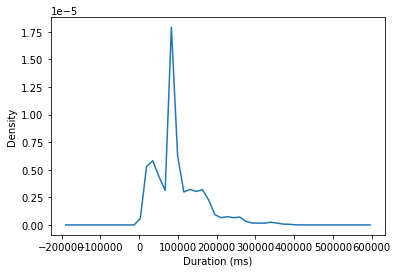

In [105]:
ax=relevantDataFrame['dur'].plot.density(ind=50)
ax.set_xlabel('Duration (ms)')

<AxesSubplot:ylabel='Frequency'>

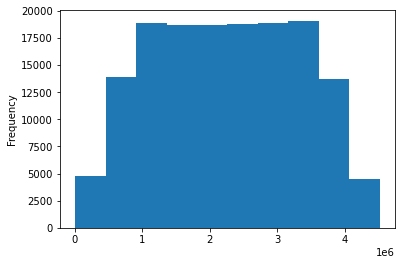

In [106]:
relevantDataFrame['email'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

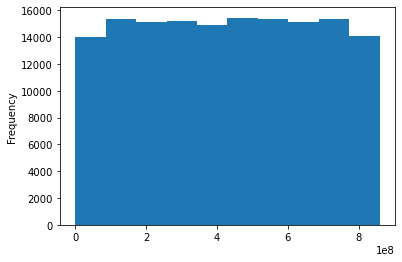

In [107]:
relevantDataFrame['gaming'].plot.hist()

# the above graph show that the data consumed by gaming seems to vary more  

<AxesSubplot:>

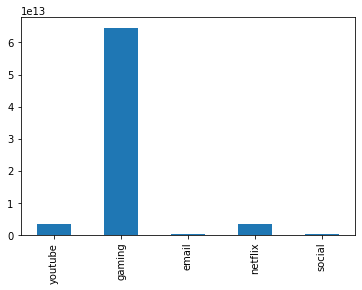

In [108]:
relevantDataFrame[['youtube','gaming','email','netflix','social']].sum().plot(kind='bar')

# From the above graph we can conclude that most user spend the data on gaming


Text(0, 0.5, 'Data Transfers')

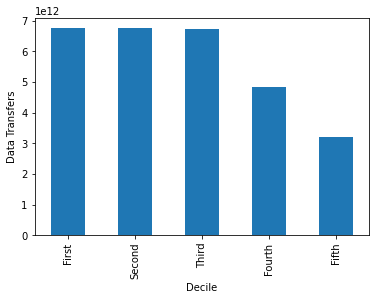

In [109]:
sum_column = dataFrame["totalUL"] + dataFrame["totalDL"]
relevantDataFrame['totalData']=sum_column

relevantDataFrame['Decile'] = pd.qcut(relevantDataFrame['dur'],11,duplicates='drop')
ax=relevantDataFrame.groupby('Decile')['totalData'].sum().sort_values(ascending=False).tail(5).plot(kind='bar',xticks=[0,1,2,3,4])
ax.set_xticklabels(['First','Second','Third','Fourth','Fifth'])
ax.set_ylabel('Data Transfers')

# the above graph segment the users into top five decile classes
based on the total duration for all sessions and compute the total data
(DL+UL) per decile class.

In [110]:
relevantDataFrame[['email','gaming','youtube','social','netflix']].corr(method ='pearson')

,email,gaming,youtube,social,netflix
email,1.000000,-0.000644,-0.002919,0.004032,0.001029
gaming,-0.000644,1.000000,-0.002999,0.001082,-0.003109
youtube,-0.002919,-0.002999,1.000000,0.000548,0.002882
social,0.004032,0.001082,0.000548,1.000000,0.001013
netflix,0.001029,-0.003109,0.002882,0.001013,1.000000


# interpreting Correlation Analysis
social media and email are more correlated than others(0.004032). The correlation b/n youtube and email(0.002919), netflix and email have relatively higher negative correlation (1.000000)

In [111]:
relevantDataFrame = dataFrame[['msisdn','dur','totalDL','totalUL','google','email','gaming','youtube','netflix','social']]
relevantDataFrame['totalAppData'] = relevantDataFrame['google'] + relevantDataFrame['youtube'] +relevantDataFrame['email']+relevantDataFrame['netflix']


# add satisfaction column to a dataframe 
# ( Satisfaction is just an arbitrary class based on totalAppData, just to show Principal column analysis)
def addSatisfactionLevel(row):
    
    if 55338486 <row['totalAppData']:
        val = 'First Class'
    elif 7432209.0 < row['totalAppData'] <55338486:
        val = 'Second Class'
    else: 
        val='N/A'
    return val


In [112]:
dataFrame=dataFrame.rename(columns = {'Total DL (Bytes)' : 'totalDL','Total UL (Bytes)' : 'totalUL','Dur. (ms)' : 'dur','MSISDN/Number':'msisdn','Last Location Name':'location','Handset Manufacturer':'manufacturer','Handset Type':'handset'})

google = dataFrame['Google DL (Bytes)']+ dataFrame['Google UL (Bytes)']
email = dataFrame['Email DL (Bytes)']+ dataFrame['Email UL (Bytes)']
gaming = dataFrame['Gaming DL (Bytes)']+ dataFrame['Gaming UL (Bytes)']
youtube = dataFrame['Youtube DL (Bytes)']+ dataFrame['Youtube UL (Bytes)']
netflix = dataFrame['Netflix DL (Bytes)']+ dataFrame['Netflix UL (Bytes)']
social = dataFrame['Social Media DL (Bytes)']+ dataFrame['Social Media UL (Bytes)']

dataFrame['google']=google
dataFrame['email']=email
dataFrame['gaming']=gaming
dataFrame['youtube']=youtube
dataFrame['netflix']=netflix
dataFrame['social']=social

#print(relevantDataFrame.head())


relevantDataFrame['Satisfaction'] = relevantDataFrame.apply(addSatisfactionLevel, axis=1)
relevantDataFrame.head(10)

,msisdn,dur,totalDL,totalUL,google,email,gaming,youtube,netflix,social,totalAppData,Satisfaction
0,3.366496e+10,1823652.0,308879636.0,36749741.0,2905912.0,3701304.0,292426453.0,18355943.0,17855187.0,1570185.0,42818346.0,Second Class
1,3.368185e+10,1365104.0,653384965.0,53800391.0,4414096.0,937385.0,609920783.0,39359124.0,35565545.0,1933278.0,80276150.0,First Class
2,3.376063e+10,1361762.0,279807335.0,27883638.0,10229119.0,3363124.0,229980251.0,34425237.0,23751202.0,1726277.0,71768682.0,First Class
3,3.375034e+10,1321509.0,846028530.0,43324218.0,11811761.0,2070983.0,810387875.0,36534765.0,15092588.0,657493.0,65510097.0,First Class
4,3.369980e+10,1089009.0,569138589.0,38542814.0,7748843.0,2110349.0,531237049.0,34222253.0,17539799.0,912788.0,61621244.0,First Class
5,3.366819e+10,1074638.0,754452212.0,30307754.0,12934133.0,2902410.0,723461512.0,23944031.0,13881809.0,3200014.0,53662383.0,Second Class
6,3.366537e+10,1035261.0,70562047.0,47925246.0,4906872.0,2090979.0,58881157.0,9120760.0,31212766.0,1624991.0,47331377.0,Second Class
7,3.376349e+10,951292.0,775350343.0,58813016.0,3872713.0,3500104.0,765055811.0,31924969.0,18933702.0,3161403.0,58231488.0,First Class
8,3.369874e+10,941634.0,861612261.0,42363146.0,8902099.0,3380069.0,828219634.0,29297508.0,19054441.0,372625.0,60634117.0,First Class
9,3.365922e+10,864482.0,850570347.0,22417975.0,8778341.0,766046.0,812946425.0,22911539.0,13185350.0,1585413.0,45641276.0,Second Class


# As we can see we have 4 Second Class and 6 First Class Entries for satisfaction. Lets check if we can get the same result after reducing the dimensionality.

In [113]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = ['social', 'email','netflix','youtube', 'gaming']
x=relevantDataFrame.groupby('msisdn').sum().loc[:, features].values
pca = PCA(n_components=2)
scaler=StandardScaler()
scaler.fit(x)
StandardScaler(copy=True, with_mean=True,with_std=True)
scaled_data=scaler.transform(x)
pca.fit(scaled_data)

principalComponents = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

print(scaled_data.shape)
principalComponents.shape

(106856, 5)


(106856, 2)

As shown above we have managed to reduce the dimensions from 5 down to 2 without losing too much information

# Let us check if the reduced dataframe results in the same satisfaction level

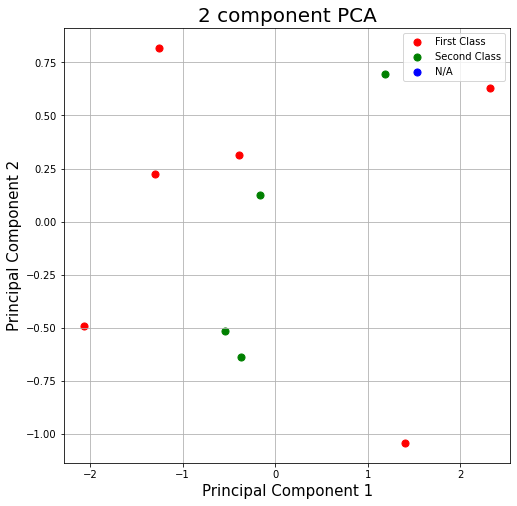

In [114]:
finalDf = pd.concat([principalDf, relevantDataFrame[['Satisfaction']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['First Class', 'Second Class', 'N/A']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Satisfaction'] == target
    ax.scatter(finalDf.head(10).loc[indicesToKeep, 'principal component 1']
               , finalDf.head(10).loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# we get the same result as before, even after reducing the Dimensionality.